In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE,RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("dataset.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

C:\Users\Albert\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = data.dropna()
data.isna().values.any()

False

In [4]:
#train split data dengan train 80% test 20%
train, test = train_test_split(data, test_size = 0.2)
print(train)

             id    host_id host_name host_response_time host_response_rate  \
10032  39617523  128821251     Akira     within an hour               100%   
5978   31838125  160236490      Mari     within an hour               100%   
2313   22152081  161213332    Nozomi     within an hour               100%   
4624   29193421   30324135      DoMo     within an hour               100%   
10155  39765960  305655334       Bin     within an hour               100%   
...         ...        ...       ...                ...                ...   
11591  41565774  276746465     Donna     within an hour                80%   
8855   37867330  256531617       Hiz     within an hour               100%   
480     9950061   49482083       Rui     within an hour               100%   
6484   32762234  191792045      Ozat     within an hour               100%   
3735   27239223  205161247     Akane     within an hour               100%   

      host_acceptance_rate host_neighbourhood host_listings_cou

In [5]:
print(test)

             id    host_id    host_name host_response_time host_response_rate  \
8476   36991651  277018146     Florence     within an hour               100%   
8551   37132706   58103809         Yong     within an hour               100%   
3910   27640978  162218189       Tosaya     within an hour               100%   
4833   29575505  220149769        Henna     within an hour               100%   
6773   33316313   25379608         Yuki     within an hour               100%   
...         ...        ...          ...                ...                ...   
6964   33647367  252888067      Takeshi     within an hour               100%   
4819   29573426  220149769        Henna     within an hour               100%   
5146   30170575   75565461  Seiji ,Yoko     within an hour               100%   
1794   20287721  144708166         Yuka     within an hour               100%   
11464  41385463  271703741      Shizuka     within an hour               100%   

      host_acceptance_rate 

In [6]:
#cek data kotor
data['host_response_time'].value_counts()

within an hour             7758
within a few hours          571
within a day                206
a few days or more           15
Chuo City, Tokyo, Japan       7
Tokyo, Japan                  5
Sumida, Tokyo, Japan          3
JP                            3
Shinjuku, Tokyo, Japan        2
tokyo                         2
Shibuya, Tokyo, Japan         1
Nakano, Tokyo, Japan          1
Japan                         1
Tokyo, Tokyo, Japan           1
Zhengzhou, Henan, China       1
Name: host_response_time, dtype: int64

In [7]:
#cek data kotor
data['host_neighbourhood'].value_counts()

Shinjuku District                                                                                             1500
Asakusa/Ueno                                                                                                  1149
Sumida District                                                                                                708
Toshima District                                                                                               705
Shibuya District                                                                                               418
                                                                                                              ... 
Nakameguro                                                                                                       1
https://a0.muscache.com/im/pictures/user/dc7a2ec7-1723-40fa-9dfc-81bce5a726f1.jpg?aki_policy=profile_small       1
https://a0.muscache.com/im/users/13113365/profile_pic/1394775310/original.jpg?ak

In [8]:
#cek data kotor
data['neighbourhood'].value_counts()

Shinjuku District      1596
Toshima District        942
Sumida District         860
Asakusa/Ueno            635
Shibuya District        600
Taito District          541
Minato District         328
Nakano District         287
Suginami District       260
Setagaya District       259
Chūō District           234
Arakawa District        215
Itabashi District       212
Kita District           203
Katsushika District     187
Shinjuku                177
Shibuya                 163
Ikebukuro               154
Bunkyo District         134
Chiyoda District        118
Meguro District          99
Nerima District          61
Shimokitazawa            55
Akasaka                  45
Edogawa District         41
Adachi District          32
Ebisu/Daikanyama         27
Tsukishima               22
Tsukiji                  19
t                        15
Roppongi                 14
f                        12
Aoyama                   11
Ginza                    10
Akihabara                 5
Harajuku            

In [9]:
# classi = data[['host_response_rate','host_total_listings_count','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','number_of_reviews','number_of_reviews_ltm','reviews_per_month','price','review_scores_rating']]
# Xclassi = data[['host_response_rate','host_total_listings_count','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','number_of_reviews','number_of_reviews_ltm','reviews_per_month','price']]
# Yclassi = data[['review_scores_rating']]
# print(Xclassi)

In [10]:
# print(Yclassi)

In [11]:
# print(classi)

In [12]:
# data['host_response_rate'].str.replace(r'%', r'.0').astype('float') / 100.0

In [13]:
# p2f(Xclassi)

In [14]:
# for i in data['host_response_time'] :
#     if i == "within an hour":
#         i == 4
#     elif i == "within a few hours":
#         i == 3
#     elif i == "within a day":
#         i == 2
#     elif i == "a few days or more":
#         i == 1
#     else:
#         i == 0

In [15]:
# def dropdata(x):
#     for i in x :
#         if i == 'within an hour':
#             i=4
#             return
#         elif i == 'within a few hours' :
#             i=3
#             return
#         elif i == 'within a day':
#             i=2
#             return
#         elif i == 'a few days or more':
#             i=1
#             return
#         else:
#             i=0
#             return

In [16]:
# data['host_acceptance_rate'].value_counts()

In [17]:
# data['host_listings_count'].value_counts()

In [18]:
# data['minimum_maximum_nights'].value_counts()

In [19]:
# data['id'].value_counts()

In [20]:
# dropdata = dropdata(data['host_response_time'])
# print(dropdata)

In [21]:
# data['host_response_time'].value_counts()

In [22]:
#drop data kotor dari kolom host rersponse time
data.drop(data[data['host_response_time'] == 'Chuo City, Tokyo, Japan'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Tokyo, Japan'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Sumida, Tokyo, Japan'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'JP'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Shinjuku, Tokyo, Japan'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'tokyo'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Zhengzhou, Henan, China'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Shibuya, Tokyo, Japan'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Tokyo, Tokyo, Japan'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Nakano, Tokyo, Japan'].index, inplace = True) 
data.drop(data[data['host_response_time'] == 'Japan'].index, inplace = True) 

In [23]:
data['host_response_time'].value_counts()

within an hour        7758
within a few hours     571
within a day           206
a few days or more      15
Name: host_response_time, dtype: int64

In [24]:
data

,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
5,872235,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,44,3,96,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,43086662,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Asakusa/Ueno,...,2,1125,2,5,1125,1125,1,1,100,1
12916,43105865,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Asakusa/Ueno,...,2,1125,2,5,1125,1125,2,2,100,2
12932,43115560,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Taito District,...,2,1125,2,5,1125,1125,1,1,100,1
12991,43142986,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Shinjuku District,...,1,1125,1,5,1125,1125,1,1,100,1


In [25]:
#simpan data baru sebelum data d ubah2/ feature engineering
newdata = data
newdata

,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
5,872235,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,44,3,96,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,43086662,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Asakusa/Ueno,...,2,1125,2,5,1125,1125,1,1,100,1
12916,43105865,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Asakusa/Ueno,...,2,1125,2,5,1125,1125,2,2,100,2
12932,43115560,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Taito District,...,2,1125,2,5,1125,1125,1,1,100,1
12991,43142986,143096922,Ming,within an hour,100%,100%,Suginami District,16,16,Shinjuku District,...,1,1125,1,5,1125,1125,1,1,100,1


In [26]:
#mengreplace nilai host response time dengan nilai int
data['host_response_time'] = data['host_response_time'].replace({'within an hour':4,'within a few hours':3,'within a day':2,'a few days or more':1})

In [27]:
data['host_response_time'] 

1        3
2        3
3        2
4        3
5        2
        ..
12889    4
12916    4
12932    4
12991    4
13001    4
Name: host_response_time, Length: 8550, dtype: int64

In [28]:
print(data)

             id    host_id            host_name  host_response_time  \
1        197677     964081      Yoshimi & Marek                   3   
2        289597     341577             Hide&Kei                   3   
3        370759    1573631  Gilles,Mayumi,Taiki                   2   
4        700253     341577             Hide&Kei                   3   
5        872235    1573631  Gilles,Mayumi,Taiki                   2   
...         ...        ...                  ...                 ...   
12889  43086662  143096922                 Ming                   4   
12916  43105865  143096922                 Ming                   4   
12932  43115560  143096922                 Ming                   4   
12991  43142986  143096922                 Ming                   4   
13001  43156623  201334932                 Saki                   4   

      host_response_rate host_acceptance_rate host_neighbourhood  \
1                   100%                  88%    Sumida District   
2          

In [29]:
data['property_type'].value_counts()

Apartment             5667
House                 1274
Hostel                 549
Condominium            320
Boutique hotel         118
Hotel                  111
Aparthotel             110
Serviced apartment     109
Villa                   84
Guesthouse              45
Loft                    39
Ryokan (Japan)          39
Hut                     31
Townhouse               17
Tiny house              12
Bed and breakfast        7
Guest suite              7
Dome house               3
Bungalow                 3
Cottage                  1
Dorm                     1
Cabin                    1
Tent                     1
Camper/RV                1
Name: property_type, dtype: int64

Penilaian properti :
3 = 'House','Hotel','Aparthotel','Condominium','Villa','Serviced apartment','Boutique Hotel','Apartment','Townhouse'
2 = 'Hostel','GuestHouse','Loft','Ryokan (Japan)', 'Guest Suite','Tiny house','Dome house'
1 = 'Hut','Bed and breakfast','Bungalow','Tent','Cabin','Cottage','Camper/RV','Dorm'

In [30]:
#mengubah data property menjadi sesuai ketentuan d atas
data['property_type'] = data['property_type'].replace({'House':3,'Hotel':3,'Aparthotel':3,'Condominium':3,'Villa':3,'Serviced apartment':3,'Boutique hotel':3,'Apartment':3,'Townhouse':3,'Hostel':2,'Guesthouse':2,'Loft':2,'Ryokan (Japan)':2, 'Guest suite':2,'Tiny house':2,'Dome house':2,'Hut':1,'Bed and breakfast':1,'Bungalow':1,'Tent':1,'Cabin':1,'Cottage':1,'Camper/RV':1,'Dorm':1})

In [31]:
data['property_type']

1        3
2        3
3        3
4        3
5        3
        ..
12889    3
12916    3
12932    3
12991    3
13001    3
Name: property_type, Length: 8550, dtype: int64

In [32]:
data['room_type'].value_counts()

Entire home/apt    6479
Private room       1362
Hotel room          435
Shared room         274
Name: room_type, dtype: int64

In [33]:
#mengubah tipe kamar menjadi angka
data['room_type'] = data['room_type'].replace({'Entire home/apt':4,'Private room':3,'Hotel room':2,'Shared room':1})

12 fitur yang dipilh adalah
1. host response rate
2. host response time
3. host acceptance rate
4. host listings count
5. host total listing count
6. property type
7. room type
8. accomodation
9. bathroom
10. bedroom
11. beds
12. guest included

In [34]:
data['host_response_rate']=data['host_response_rate'].replace('\%','',regex=True).astype(float)

In [35]:
data['host_response_rate']/100 

1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
12889    1.0
12916    1.0
12932    1.0
12991    1.0
13001    1.0
Name: host_response_rate, Length: 8550, dtype: float64

In [36]:
data['host_acceptance_rate']=data['host_acceptance_rate'].replace('\%','',regex=True).astype(float)

In [37]:
data['host_acceptance_rate']/100 

1        0.88
2        0.82
3        0.93
4        0.82
5        0.93
         ... 
12889    1.00
12916    1.00
12932    1.00
12991    1.00
13001    0.99
Name: host_acceptance_rate, Length: 8550, dtype: float64

In [38]:
#menghapus $ dan , dari price
data['price']=data['price'].replace('\$','',regex=True).astype(str)
data['price']=data['price'].replace('\,','',regex=True).astype(str)

In [39]:
#mengubah jadi float
data['price'].astype(float)


1        11048.0
2         4171.0
3         6952.0
4         3957.0
5         8045.0
          ...   
12889    24026.0
12916    19951.0
12932    19951.0
12991    12013.0
13001     4505.0
Name: price, Length: 8550, dtype: float64

In [40]:
#mengubah jadi float
data['host_listings_count'].astype(float)


1         1.0
2         2.0
3         3.0
4         2.0
5         3.0
         ... 
12889    16.0
12916    16.0
12932    16.0
12991    16.0
13001     1.0
Name: host_listings_count, Length: 8550, dtype: float64

In [41]:
data['host_total_listings_count'].astype(float)


1         1.0
2         2.0
3         3.0
4         2.0
5         3.0
         ... 
12889    16.0
12916    16.0
12932    16.0
12991    16.0
13001     1.0
Name: host_total_listings_count, Length: 8550, dtype: float64

In [42]:
#mengubah jadi float
data['accommodates'].astype(float)


1        2.0
2        2.0
3        2.0
4        2.0
5        3.0
        ... 
12889    9.0
12916    7.0
12932    7.0
12991    6.0
13001    4.0
Name: accommodates, Length: 8550, dtype: float64

In [43]:
#mengubah jadi float
data['bathrooms'].astype(float)


1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
12889    1.5
12916    1.5
12932    1.5
12991    1.5
13001    1.5
Name: bathrooms, Length: 8550, dtype: float64

In [44]:
#mengubah jadi float
data['bedrooms'].astype(float)


1        1.0
2        1.0
3        0.0
4        1.0
5        2.0
        ... 
12889    3.0
12916    3.0
12932    2.0
12991    2.0
13001    1.0
Name: bedrooms, Length: 8550, dtype: float64

In [45]:
#mengubah jadi float
data['beds'].astype(float)


1        2.0
2        1.0
3        1.0
4        1.0
5        2.0
        ... 
12889    5.0
12916    4.0
12932    4.0
12991    3.0
13001    3.0
Name: beds, Length: 8550, dtype: float64

In [46]:
#mengubah jadi float
data['guests_included'].astype(float)

1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
12889    6.0
12916    5.0
12932    4.0
12991    4.0
13001    2.0
Name: guests_included, Length: 8550, dtype: float64

# No 2

In [47]:
#masukkan data dengan data data yang sudah di feature engineering
NO2 = data[["host_response_rate","host_response_time","host_acceptance_rate","host_listings_count","host_total_listings_count","property_type","room_type","accommodates","bathrooms","bedrooms","beds","guests_included","price"]]
Y2 = data[["price"]]
X2 =  data[["host_response_rate","host_response_time","host_acceptance_rate","host_listings_count","host_total_listings_count","property_type","room_type","accommodates","bathrooms","bedrooms","beds","guests_included"]]

In [48]:
print(NO2)

       host_response_rate  host_response_time  host_acceptance_rate  \
1                   100.0                   3                  88.0   
2                   100.0                   3                  82.0   
3                   100.0                   2                  93.0   
4                   100.0                   3                  82.0   
5                   100.0                   2                  93.0   
...                   ...                 ...                   ...   
12889               100.0                   4                 100.0   
12916               100.0                   4                 100.0   
12932               100.0                   4                 100.0   
12991               100.0                   4                 100.0   
13001               100.0                   4                  99.0   

      host_listings_count host_total_listings_count  property_type  room_type  \
1                       1                         1              3

Di atas adalah feature engineering dimana saya menghapus beberapa data yang tidak diperlukan dan mengganggu untuk menjalankan kodingan. Serta saya mengubah fitur fitur yang saya perlukan menjadi tipe data float64. Feature engineering ini memiliki pengaruh untuk membantu saya menjalankan kodingan. Dan juga membantu saya untuk lebih mudah menentukan akurasi dari target target

In [49]:
X2train,X2test,Y2train,Y2test = train_test_split(X2,Y2,test_size = 0.2)

Feature Selection

In [50]:
# Feature selection dengan Recursive feature elimination
model = LinearRegression()
rfe = RFE(model, 12)
rfe = rfe.fit(X2train,Y2train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE Memilih semua 12 fitur yang telah saya pilih untuk digunakan untuk memprediksi harga dengan linearRegression

In [51]:
#Feature selection dengan Recursive Feature Elimination and cross validated selection
rfecv = RFECV(model, 12)
rfecv = rfecv.fit(X2train,Y2train)
print(rfecv.support_)
print(rfecv.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RFECV Memilih semua 12 fitur yang telah saya pilih untuk digunakan untuk memprediksi harga dengan linearRegression

In [52]:
#implement LinearRegression
from sklearn import metrics
model.fit(X2train, Y2train)
Y2pred = model.predict(X2test)
print('Nilai Model linear regression classifier',model.score(X2,Y2))

Nilai Model linear regression classifier 0.06396956021966005


In [53]:
print("Mean Absolute Error (MAE): ", mean_absolute_error(Y2test, Y2pred))
print("Mean Squared Error (MSE): ", mean_squared_error(Y2test, Y2pred))
print("R2: ", r2_score(Y2test, Y2pred))

Mean Absolute Error (MAE):  22932.175862232827
Mean Squared Error (MSE):  4879692864.437112
R2:  0.049091617420255806


In [54]:
X2trainnew,X2testnew,Y2trainnew,Y2testnew = train_test_split(X2,Y2,test_size = 0.2)

In [55]:
model2 = LogisticRegression()
rfe = RFE(model2, 12)
rfe = rfe.fit(X2trainnew,Y2trainnew)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


RFE Memilih semua 12 fitur yang telah saya pilih untuk digunakan untuk memprediksi harga dengan logisticRegression

In [56]:
rfecv = RFECV(model2, 12)
rfecv = rfecv.fit(X2trainnew,Y2trainnew)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


RFECV juga memilih ke 12 fitur yang telah saya pilih sebelumnya untuk memprediksi harga dengan logisticRegression

In [57]:
#implement LogisticRegression
from sklearn import metrics
model2 = LogisticRegression()
model2.fit(X2trainnew, Y2trainnew)
Y2prednew = model2.predict(X2testnew)
print('Nilai model logistic regression classifier',model2.score(X2,Y2))

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Nilai model logistic regression classifier 0.0992982456140351


In [58]:
print("Mean Absolute Error (MAE): ", mean_absolute_error(Y2testnew, Y2prednew))
print("Mean Squared Error (MSE): ", mean_squared_error(Y2testnew, Y2prednew))
print("R2: ", r2_score(Y2testnew, Y2prednew))

Mean Absolute Error (MAE):  25473.954970760235
Mean Squared Error (MSE):  8742574266.821638
R2:  -0.0820390105092601


jadi dari hasil di atas dapat kita lihat bahwa nilai model/ accuracy dimiliki oleh logistic regression. Namun untuk R2 yang merupakan koefisien seberapa baik value prediksi "fit" di bandingkan dengan value original. jika kita lihat di atas kita dapat melihat bahwa  R2 dari linear regression adalah 0.05 sedangkan nilai R2 dari logistic regression adalah sekitar -0.15, hal ini membuktikan bahwa nilai prediksi yang di dapatkan dari logistic regression sangat tidak "fit" dengan nilai original, bahkan bisa di sebut berlawanan dengan nilai original yang ada. Karena itulah dapat di sebut bahwa linear regression lebih cocok untuk memprediksi nilai harga di banding logical regression 

# No 3,4,5

feature selection

In [59]:
# memasukkan data yang belum di feature engineering
NO3 = newdata[["host_response_rate","host_response_time","host_acceptance_rate","host_listings_count","host_total_listings_count","property_type","room_type","accommodates","bathrooms","bedrooms","beds","guests_included","review_scores_rating"]]
X3 = newdata[["host_response_rate","host_response_time","host_acceptance_rate","host_listings_count","host_total_listings_count","property_type","room_type","accommodates","bathrooms","bedrooms","beds","guests_included"]]
Y3 = newdata[["review_scores_rating"]]

Encoding merupakan salah satu metode feature selection yang memiliki fungsi untuk mengubah string string yang ada di dalam kolom menjadi kedalam bentuk numeric values. maka dari itu saya di sini menggunakan data yang belum saya feature engineering untuk tipe data dan ubah kedalam bentuk numeric di sini

In [60]:
from sklearn import preprocessing
#labelEncoder
encoder = preprocessing.LabelEncoder()
# Fit encoder
newdata[['host_response_time']]=encoder.fit_transform(newdata[['host_response_time']])
print(newdata[['host_response_time']])

       host_response_time
1                       2
2                       2
3                       1
4                       2
5                       1
...                   ...
12889                   3
12916                   3
12932                   3
12991                   3
13001                   3

[8550 rows x 1 columns]


C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


disini dapat dilihat bahwa encoder mengubah data di tabel newdata kolom host response time dari yang sebelumnya berupa string menjadi kedalam bentuk numeric values

In [61]:
#labelEncoder
encoder = preprocessing.LabelEncoder()
# Fit encoder
newdata[['property_type']]=encoder.fit_transform(newdata[['property_type']])
print(newdata[['property_type']])

       property_type
1                  2
2                  2
3                  2
4                  2
5                  2
...              ...
12889              2
12916              2
12932              2
12991              2
13001              2

[8550 rows x 1 columns]


In [62]:
#labelEncoder
encoder = preprocessing.LabelEncoder()
# Fit encoder
newdata[['room_type']]=encoder.fit_transform(newdata[['room_type']])
print(newdata[['room_type']])

       room_type
1              3
2              3
3              3
4              3
5              3
...          ...
12889          3
12916          3
12932          3
12991          3
13001          3

[8550 rows x 1 columns]


In [63]:
X3train,X3test,Y3train,Y3test = train_test_split(X3,Y3,test_size = 0.2)

In [64]:
classifier = KNeighborsClassifier(n_neighbors = 7 )
classifier.fit(X3train,Y3train)
Y3pred = classifier.predict(X3test)
print("Accuracy:",accuracy_score(Y3test, Y3pred))
print(confusion_matrix(Y3test,Y3pred))
print(classification_report(Y3test,Y3pred))

Accuracy: 0.12923976608187135
[[129   0   0 ...  15  14   2]
 [  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [ 42   0   0 ...  13  13   2]
 [ 42   0   0 ...  10  11   5]
 [ 21   0   0 ...  10   7   4]]
              precision    recall  f1-score   support

         100       0.22      0.55      0.32       234
          20       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          55       0.00      0.00      0.00         0
          60       0.00      0.00      0.00         9
          65       0.00      0.00      0.00         0
          67       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         0
          70       0.00      0.00      0.00        11
          71       0.00      0.00      0.00         2
          72       0.

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [65]:
X4train,X4test,Y4train,Y4test = train_test_split(X3,Y3,test_size = 0.2)

In [66]:
classifier2 = SVC(kernel='linear')
classifier2.fit(X4train, Y4train)
Y4pred = classifier2.predict(X4test)
print('Accuracy: ', metrics.accuracy_score(Y4test, Y4pred))
print(confusion_matrix(Y4test,Y4pred))
print(classification_report(Y4test,Y4pred))

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.16783625730994153
[[287   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  2   0   0 ...   0   0   0]
 ...
 [146   0   0 ...   0   0   0]
 [130   0   0 ...   0   0   0]
 [ 61   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

         100       0.17      1.00      0.29       287
          20       0.00      0.00      0.00         3
          40       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         2
          60       0.00      0.00      0.00         9
          62       0.00      0.00      0.00         1
          63       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         3
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         2
          69       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         6
          71       0.00      0.00      0.00         3
          72       0

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
X5train,X5test,Y5train,Y5test = train_test_split(X3,Y3,test_size = 0.2)

In [68]:
classifier3 = DecisionTreeClassifier(random_state = 0,max_depth=12, min_samples_leaf=12)
classifier3.fit(X5train, Y5train)
Y5pred = classifier3.predict(X5test)
print('Accuracy: ', metrics.accuracy_score(Y5test, Y5pred))
print(confusion_matrix(Y5test,Y5pred))
print(classification_report(Y5test,Y5pred))

Accuracy:  0.14619883040935672
[[158   0   0 ...  11  12   8]
 [  1   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [ 45   0   0 ...  15   8   6]
 [ 36   0   0 ...  12   5  10]
 [ 30   0   0 ...   9   8   8]]
              precision    recall  f1-score   support

         100       0.24      0.60      0.34       263
          20       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         8
          64       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         2
          68       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         7
          71       0.00      0.00      0.00         4
          72       0.00      0.00      0.00         2
          73       0.00      0.00      0.00        11
          74       0

C:\Users\Albert\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


dari data data di atas didapat akurasi yang berbeda beda. Dengan SVC memiliki akurasi yang paling besar dengan akurasi sekitar 16%, akurasi terbesar kedua dimiliki oleh Classification tree (decision tree) dengan akurasi sebesar 15% dan yang paling kecil akurasinya dimiliki oleh Nearest Neighbour atau KNN dengan akurasi sekitar 13%. jadi dari akurasi akurasi di atas dapat di simpulkan bahwa klasifikasi terbaik yang dapat memprediksi nilai review score rating dengan fitur fitur yang saya miliki adalah dengan menggunakan model SVC(support vector classifier). Accuracy yang saya dapat juga termasuk kecil yakni di bawah 20%. Hal ini bisa terjadi karena fitur fitur utama yang saya pilih dari dataset yang saya miliki tidak memiliki pengaruh yang cukup besar terhadap review score rating. 

# No 7

In [69]:
Feature = newdata[["host_response_rate","host_response_time","host_acceptance_rate","host_listings_count","host_total_listings_count","property_type","room_type","accommodates","bathrooms","bedrooms","beds","guests_included"]]

In [70]:
#Kmean training
Kmean = KMeans(n_clusters=3).fit(Feature)
KmeanLabels = Kmean.labels_
KmeanClusterCenters = Kmean.cluster_centers_
KmeanPredict = Kmean.predict(Feature)
print("Labels : ", KmeanLabels)
print("Centre : ", KmeanClusterCenters)
print("Predict : ", KmeanPredict)

Labels :  [0 0 0 ... 0 0 0]
Centre :  [[98.43256475  2.8809223  97.70578016  7.30653822  7.30653822  1.92056222
   2.68019583  4.74273531  1.28766582  1.42261529  2.87144662  2.53474416]
 [98.31449631  2.93857494 98.56511057 93.13022113 93.13022113  1.86977887
   2.53316953  3.57739558  1.1977887   1.08845209  1.94594595  1.78378378]
 [97.71838763  2.8625069  97.3158476  34.15019326 34.15019326  1.87299834
   2.53672004  4.05908338  1.46852568  1.16454997  2.50358918  2.42241855]]
Predict :  [0 0 0 ... 0 0 0]


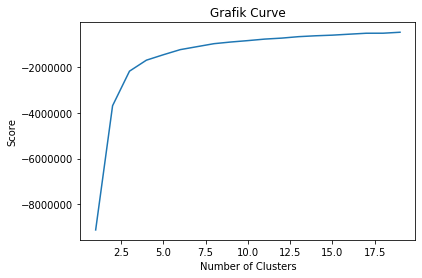

In [71]:
ClusterNumber = range(1, 20)
Kmean = [KMeans(n_clusters=i) for i in ClusterNumber]
Score = [Kmean[i].fit(Feature).score(Feature) for i in range(len(Kmean))]
pyp.plot(ClusterNumber, Score)
pyp.xlabel('Number of Clusters')
pyp.ylabel('Score')
pyp.title('Grafik Curve')
pyp.show()

In [72]:
# pyp.subplot(221)
# sns.swarmplot(KmeanLabels , newdata["host_response_rate"])
# pyp.subplot(222)
# sns.swarmplot(KmeanLabels , newdata["host_response_time"])
# pyp.subplot(223)
# sns.swarmplot(KmeanLabels , newdata["host_acceptance_rate"])
# pyp.subplots_adjust(hspace = 0.5, wspace = 0.5)
# pyp.rcParams["figure.figsize"] = [16,9]
# pyp.show()



In [73]:
# pyp.subplot(224)
# sns.swarmplot(KmeanLabels , newdata["host_listings_count"])
# pyp.subplot(225)
# sns.swarmplot(KmeanLabels , newdata["host_total_listings_count"])
# pyp.subplot(226)
# sns.swarmplot(KmeanLabels , newdata["property_type"])
# pyp.subplots_adjust(hspace = 0.5, wspace = 0.5)
# pyp.rcParams["figure.figsize"] = [16,9]
# pyp.show()

In [74]:
# pyp.subplot(227)
# sns.swarmplot(KmeanLabels , newdata["room_type"])
# pyp.subplot(228)
# sns.swarmplot(KmeanLabels , newdata["accommodates"])
# pyp.subplot(229)
# sns.swarmplot(KmeanLabels , newdata["bathrooms"])
# pyp.subplots_adjust(hspace = 0.5, wspace = 0.5)
# pyp.rcParams["figure.figsize"] = [16,9]
# pyp.show()

In [75]:
# pyp.subplot(230)
# sns.swarmplot(KmeanLabels , newdata["bedrooms"])
# pyp.subplot(231)
# sns.swarmplot(KmeanLabels , newdata["beds"])
# pyp.subplot(232)
# sns.swarmplot(KmeanLabels , newdata["guests_included"])
# pyp.subplots_adjust(hspace = 0.5, wspace = 0.5)
# pyp.rcParams["figure.figsize"] = [16,9]
# pyp.show()

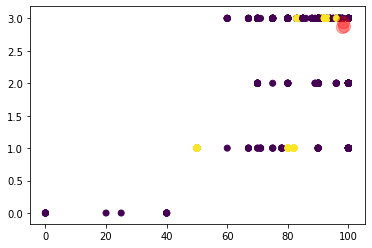

KMeans model score:  0.5662242172550532


In [76]:
pyp.scatter(Feature.iloc[:, 0], Feature.iloc[:, 1], c = KmeanPredict)
pyp.scatter(KmeanClusterCenters[:, 0], KmeanClusterCenters[:, 1], c = "r", s=150, alpha=0.3);
pyp.show()
print("KMeans model score: ", silhouette_score(Feature, KmeanPredict))

# N0 6

In [77]:
Gauss = GaussianMixture(n_components=3).fit(Feature)
GaussPredict = Gauss.predict(Feature)
print("Predict : ", GaussPredict)

Predict :  [0 0 0 ... 2 2 2]


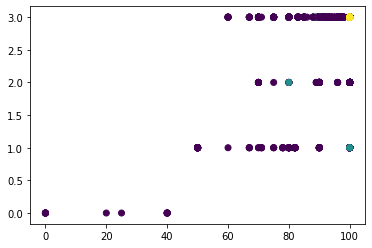

Gauss model score:  -0.062188469181438194


In [78]:
pyp.scatter(Feature.iloc[:, 0], Feature.iloc[:, 1], c = GaussPredict)
pyp.show()
print("Gauss model score: ", silhouette_score(Feature, GaussPredict))

dari persebaran data dengan dua model di atas dapat dilihat bahwa keduanya memiliki kemiripan yang hampir mendekati 100% namun pada model Kmeans terdapat dua titik merah yang juga merupakan center dari feature feature yang ada di dalam fitur fitur yang saya pilih sedangkan gauss mixture model tidak ada karena model tersebut memang tidak memiliki library untuk mencari centre dari fitur fitur yang ada. dan juga dari model score di atas dapat dilihat bahwa model score dari kmean adalah 56% yang adalah suatu hasil yang cukup bagus untuk sebuah model clustering, sedangkan untuk gauss mixture model ia mendapat score -6%. Nilai Minus ini menandakan bahwa model ini sangat tidak cocok untuk memetakan persebaran data dari fitur fitur ini. 